In [1]:
# -*- coding: utf-8 -*-
import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
from matplotlib.collections import LineCollection
from sklearn import cluster, covariance, manifold

In [3]:
from datetime import datetime

In [4]:
#matplotlib 한글 폰트 깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
# 코드: 주식명 초기화
symbol_dict = {
'20':'동화약품',
'30':'우리은행',
'40':'KR모터스',
'50':'경방',
'60':'메리츠화재',
'70':'삼양홀딩스',
'75':'삼양홀딩스우',
'80':'하이트진로',
'87':'하이트진로2우B',
'100':'유한양행',
'105':'유한양행우',
'120':'CJ대한통운',
'140':'하이트진로홀딩스',
'145':'하이트진로홀딩스우',
'150':'두산',
'155':'두산우',
'157':'두산2우B',
'180':'성창기업지주',
'210':'대림산업',
'215':'대림산업우',
'220':'유유제약',
'225':'유유제약1우',
'227':'유유제약2우B',
'230':'일동홀딩스',
'240':'한국타이어월드와이드',
'270':'기아차',
'300':'대유플러스',
'320':'노루홀딩스',
'325':'노루홀딩스우',
'327':'노루홀딩스2우B',
'370':'한화손해보험',
'390':'삼화페인트',
'400':'롯데손해보험',
'430':'대원강업',
'480':'조선내화',
'490':'대동공업',
'500':'가온전선',
'520':'삼일제약',
'540':'흥국화재',
'545':'흥국화재우',
'547':'흥국화재2우B',
'590':'CS홀딩스',
'640':'동아쏘시오홀딩스',
'650':'천일고속',
'660':'SK하이닉스',
'670':'영풍',
'680':'LS네트웍스',
'700':'유수홀딩스',
'720':'현대건설',
'725':'현대건설우',
'760':'이화산업',
'810':'삼성화재',
'815':'삼성화재우',
'850':'화천기공',
'860':'강남제비스코',
'880':'한화',
'885':'한화우',
'88K':'한화3우B',
'890':'보해양조',
'910':'유니온',
'950':'전방',
'970':'한국주철관',
'990':'동부하이텍',
'995':'동부하이텍1우',
'1020':'페이퍼코리아',
'1040':'CJ',
'1045':'CJ우',
'1060':'JW중외제약',
'1065':'JW중외제약우',
'1067':'JW중외제약2우B',
'1070':'대한방직',
'1080':'만호제강',
'1120':'LG상사',
'1130':'대한제분',
'1140':'국보',
'1200':'유진투자증권',
'1210':'금호전기',
'1230':'동국제강',
'1250':'GS글로벌',
'1260':'남광토건',
'1270':'부국증권',
'1275':'부국증권우',
'1290':'골든브릿지증권',
'1340':'백광산업',
'1360':'삼성제약',
'1380':'SG충방',
'1390':'KG케미칼',
'1420':'태원물산',
'1430':'세아베스틸',
'1440':'대한전선',
'1450':'현대해상',
'1460':'BYC',
'1465':'BYC우',
'1470':'삼부토건',
'1500':'HMC투자증권',
'1510':'SK증권',
'1515':'SK증권우',
'1520':'동양',
'1525':'동양우',
'1527':'동양2우B',
'1529':'동양3우B',
'1530':'동일방직',
'1550':'조비',
'1560':'제일연마',
'1570':'금양',
'1620':'동국실업',
'1630':'종근당홀딩스',
'1680':'대상',
'1685':'대상우',
'1720':'신영증권',
'1725':'신영증권우',
'1740':'SK네트웍스',
'1745':'SK네트웍스우',
'1750':'한양증권',
'1755':'한양증권우',
'1770':'신화실업',
'1780':'알루코',
'1790':'대한제당',
'1795':'대한제당우',
'1799':'대한제당3우B',
'1800':'오리온',
'1820':'삼화콘덴서',
'1880':'삼호',
'1940':'KISCO홀딩스',
'2000':'한국유리',
'2005':'한국유리우',
'2020':'코오롱',
'2025':'코오롱우',
'2030':'아세아',
'2070':'남영비비안',
'2100':'경농',
'2140':'고려산업',
'2150':'도화엔지니어링',
'2170':'삼양통상',
'2200':'수출포장',
'2210':'동성제약',
'2220':'한일철강',
'2240':'고려제강',
'2250':'알보젠코리아',
'2270':'롯데푸드',
'2300':'한국제지',
'2310':'아세아제지',
'2320':'한진',
'2350':'넥센타이어',
'2355':'넥센타이어1우B',
'2360':'SH에너지화학',
'2380':'KCC',
'2390':'한독',
'2410':'범양건영',
'2420':'세기상사',
'2450':'삼익악기',
'2460':'화성산업',
'2550':'KB손해보험',
'2600':'조흥',
'2620':'제일약품',
'2630':'오리엔트바이오',
'2690':'동일제강',
'2700':'신일산업',
'2710':'TCC동양',
'2720':'국제약품',
'2760':'보락',
'2780':'진흥기업',
'2785':'진흥기업우B',
'2787':'진흥기업2우B',
'2790':'아모레G',
'2795':'아모레G우',
'2810':'삼영무역',
'2820':'선창산업',
'2840':'미원상사',
'2870':'신풍제지',
'2880':'대유에이텍',
'2900':'동양물산',
'2920':'유성기업',
'2960':'한국쉘석유',
'2990':'금호산업',
'2995':'금호산업우',
'3000':'부광약품',
'3010':'혜인',
'3030':'세아제강',
'3060':'에이프로젠제약',
'3070':'코오롱글로벌',
'3075':'코오롱글로벌우',
'3080':'성보화학',
'3090':'대웅',
'3120':'일성신약',
'3160':'디아이',
'3200':'일신방직',
'3220':'대원제약',
'3230':'삼양식품',
'3240':'태광산업',
'3280':'흥아해운',
'3300':'한일시멘트',
'3350':'한국화장품제조',
'3410':'쌍용양회',
'3415':'쌍용양회우',
'3419':'쌍용양회3우B',
'3460':'유화증권',
'3465':'유화증권우',
}

In [6]:
symbols, names = np.array(list(symbol_dict.items())).T
names

array(['동화약품', '우리은행', 'KR모터스', '경방', '메리츠화재', '삼양홀딩스', '삼양홀딩스우', '하이트진로',
       '하이트진로2우B', '유한양행', '유한양행우', 'CJ대한통운', '하이트진로홀딩스', '하이트진로홀딩스우',
       '두산', '두산우', '두산2우B', '성창기업지주', '대림산업', '대림산업우', '유유제약', '유유제약1우',
       '유유제약2우B', '일동홀딩스', '한국타이어월드와이드', '기아차', '대유플러스', '노루홀딩스',
       '노루홀딩스우', '노루홀딩스2우B', '한화손해보험', '삼화페인트', '롯데손해보험', '대원강업', '조선내화',
       '대동공업', '가온전선', '삼일제약', '흥국화재', '흥국화재우', '흥국화재2우B', 'CS홀딩스',
       '동아쏘시오홀딩스', '천일고속', 'SK하이닉스', '영풍', 'LS네트웍스', '유수홀딩스', '현대건설',
       '현대건설우', '이화산업', '삼성화재', '삼성화재우', '화천기공', '강남제비스코', '한화', '한화우',
       '한화3우B', '보해양조', '유니온', '전방', '한국주철관', '동부하이텍', '동부하이텍1우',
       '페이퍼코리아', 'CJ', 'CJ우', 'JW중외제약', 'JW중외제약우', 'JW중외제약2우B', '대한방직',
       '만호제강', 'LG상사', '대한제분', '국보', '유진투자증권', '금호전기', '동국제강', 'GS글로벌',
       '남광토건', '부국증권', '부국증권우', '골든브릿지증권', '백광산업', '삼성제약', 'SG충방',
       'KG케미칼', '태원물산', '세아베스틸', '대한전선', '현대해상', 'BYC', 'BYC우', '삼부토건',
       'HMC투자증권', 'SK증권', 'SK증권우', '동양', '동양우', '동양2우B', '동양3우B', '동일방직',
       

# 데이터 로드

In [7]:
result1 = pd.read_table('../../Stock_data\\Kospi_day\\1_Kospi.txt', sep='\s')
result2 = pd.read_table('../../Stock_data\\Kospi_day\\2_Kospi.txt', sep='\s')
result3 = pd.read_table('../../Stock_data\\Kospi_day\\3_Kospi.txt', sep='\s')
result4 = pd.read_table('../../Stock_data\\Kospi_day\\4_Kospi.txt', sep='\s')
result5 = pd.read_table('../../Stock_data\\Kospi_day\\5_Kospi.txt', sep='\s')
result6 = pd.read_table('../../Stock_data\\Kospi_day\\6_Kospi.txt', sep='\s')
result7 = pd.read_table('../../Stock_data\\Kospi_day\\7_Kospi.txt', sep='\s')
result8 = pd.read_table('../../Stock_data\\Kospi_day\\8_Kospi.txt', sep='\s')
result9 = pd.read_table('../../Stock_data\\Kospi_day\\9_Kospi.txt', sep='\s')
result10 = pd.read_table('../../Stock_data\\Kospi_day\\10_Kospi.txt', sep='\s')

C:\Users\KyeoRae\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\KyeoRae\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\KyeoRae\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate f

In [8]:
# 하나로 합치기
total=result1.append(result2,ignore_index=True)
total=total.append(result3, ignore_index=True)
total=total.append(result4, ignore_index=True)
total=total.append(result5, ignore_index=True)
total=total.append(result6, ignore_index=True)
total=total.append(result7, ignore_index=True)
total=total.append(result8, ignore_index=True)
total=total.append(result9, ignore_index=True)
total=total.append(result10, ignore_index=True)

In [9]:
# to datetime
total['date']= total['date'].map(lambda x : datetime.strptime(str(x), "%Y%m%d").date() )

In [10]:
dic= dict(list(total.groupby('code')))

# 주식별로 분리

In [11]:
tmp = []
for a in dic.keys():
    b = dic[a]
    b = b.to_records(index=False, convert_datetime64=True)
    b.sort()
    if(len(b) == 8551):
        tmp.append(b)

C:\Users\KyeoRae\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'convert_datetime64' parameter is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [12]:
tmp

[rec.array([(20, datetime.date(1985, 1, 4), 9410, 9410),
            (20, datetime.date(1985, 1, 5), 9400, 9410),
            (20, datetime.date(1985, 1, 7), 9490, 9620), ...,
            (20, datetime.date(2016, 12, 27), 7930, 7900),
            (20, datetime.date(2016, 12, 28), 7950, 8130),
            (20, datetime.date(2016, 12, 29), 8000, 8120)],
           dtype=[('code', 'O'), ('date', 'O'), ('open', '<i8'), ('close', '<i8')]),
 rec.array([(40, datetime.date(1985, 1, 4), 300, 300),
            (40, datetime.date(1985, 1, 5), 300, 300),
            (40, datetime.date(1985, 1, 7), 300, 310), ...,
            (40, datetime.date(2016, 12, 27), 853, 855),
            (40, datetime.date(2016, 12, 28), 847, 865),
            (40, datetime.date(2016, 12, 29), 870, 863)],
           dtype=[('code', 'O'), ('date', 'O'), ('open', '<i8'), ('close', '<i8')]),
 rec.array([(50, datetime.date(1985, 1, 4), 10205, 10205),
            (50, datetime.date(1985, 1, 5), 10205, 10205),
            (50,

In [13]:
open = np.array([q.open for q in tmp]).astype(np.float)
close = np.array([q.close for q in tmp]).astype(np.float)
variation = close - open

In [19]:
variation

array([[ 0.0e+00,  1.0e+01,  1.3e+02, ..., -3.0e+01,  1.8e+02,  1.2e+02],
       [ 0.0e+00,  0.0e+00,  1.0e+01, ...,  2.0e+00,  1.8e+01, -7.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00, ...,  3.0e+02, -3.0e+02, -3.5e+02],
       ...,
       [ 0.0e+00,  0.0e+00,  0.0e+00, ...,  1.0e+03,  1.0e+03, -3.0e+03],
       [ 0.0e+00,  0.0e+00,  0.0e+00, ..., -2.0e+02,  2.5e+02,  5.0e+02],
       [ 0.0e+00,  0.0e+00,  2.5e+02, ..., -3.0e+02,  5.0e+01,  0.0e+00]])

# Affinity Propagation

In [14]:
edge_model = covariance.GraphLassoCV()

C:\Users\KyeoRae\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class GraphLassoCV is deprecated; The 'GraphLassoCV' was renamed to 'GraphicalLassoCV' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
X = variation.copy().T

In [16]:
X /= X.std(axis=0)

In [17]:
edge_model.fit(X)

C:\Users\KyeoRae\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\KyeoRae\Anaconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:240: RuntimeWarning: invalid value encountered in multiply
  * coefs)
C:\Users\KyeoRae\Anaconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:242: RuntimeWarning: invalid value encountered in multiply
  * coefs)


GraphLassoCV(alphas=4, assume_centered=False, cv='warn', enet_tol=0.0001,
             max_iter=100, mode='cd', n_jobs=None, n_refinements=4, tol=0.0001,
             verbose=False)

In [82]:
_, labels = cluster.affinity_propagation(edge_model.covariance_)

In [83]:
n_labels = labels.max()

In [84]:
for i in range(n_labels + 1):
    tmp = []
    for ix, label in enumerate(labels):
        if label == i:
            tmp.append(ix)
    tmp2 = []
    for ix in tmp:
        tmp2.append(names[ix])
    print('cluster {}: {}'.format(i + 1, ', '.join(tmp2)))

cluster 1: KR모터스
cluster 2: 하이트진로, 화천기공
cluster 3: 유한양행, 유유제약2우B, 노루홀딩스우, 천일고속, JW중외제약2우B, 유진투자증권
cluster 4: 하이트진로홀딩스우, 두산, 동부하이텍1우
cluster 5: 경방, 두산2우B, 성창기업지주, 유유제약1우
cluster 6: 기아차
cluster 7: 삼양홀딩스우, 대유플러스, 유수홀딩스, 이화산업, 국보
cluster 8: 노루홀딩스2우B
cluster 9: 동화약품, 하이트진로2우B, 롯데손해보험, 흥국화재우, 삼성화재, 동부하이텍, 남광토건, HMC투자증권
cluster 10: 흥국화재2우B
cluster 11: 메리츠화재, 삼양홀딩스, 일동홀딩스, 노루홀딩스, LS네트웍스, 강남제비스코, 전방, CJ, 삼성제약, BYC
cluster 12: 한국타이어월드와이드, 대동공업, 삼일제약, 흥국화재, SK하이닉스, 영풍, 현대건설우, 한화우, 한화3우B, 보해양조, 만호제강, 금호전기, 백광산업, 동양
cluster 13: CJ우
cluster 14: JW중외제약우
cluster 15: CJ대한통운, 하이트진로홀딩스, 가온전선, LG상사, 부국증권우
cluster 16: 동국제강
cluster 17: 우리은행, 두산우, 유유제약, 한국주철관, 대한방직, GS글로벌, KG케미칼
cluster 18: 대원강업, 조선내화, CS홀딩스, 삼성화재우, 대한제분, 골든브릿지증권
cluster 19: SG충방
cluster 20: 태원물산
cluster 21: 대림산업, 동아쏘시오홀딩스, 현대건설, 한화, 세아베스틸, 대한전선
cluster 22: 현대해상
cluster 23: BYC우
cluster 24: 유한양행우, 대림산업우, 한화손해보험, 삼화페인트, 유니온, 페이퍼코리아, JW중외제약, 부국증권, 삼부토건, SK증권, SK증권우, 동양우


In [85]:
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

# Clustering 시각화

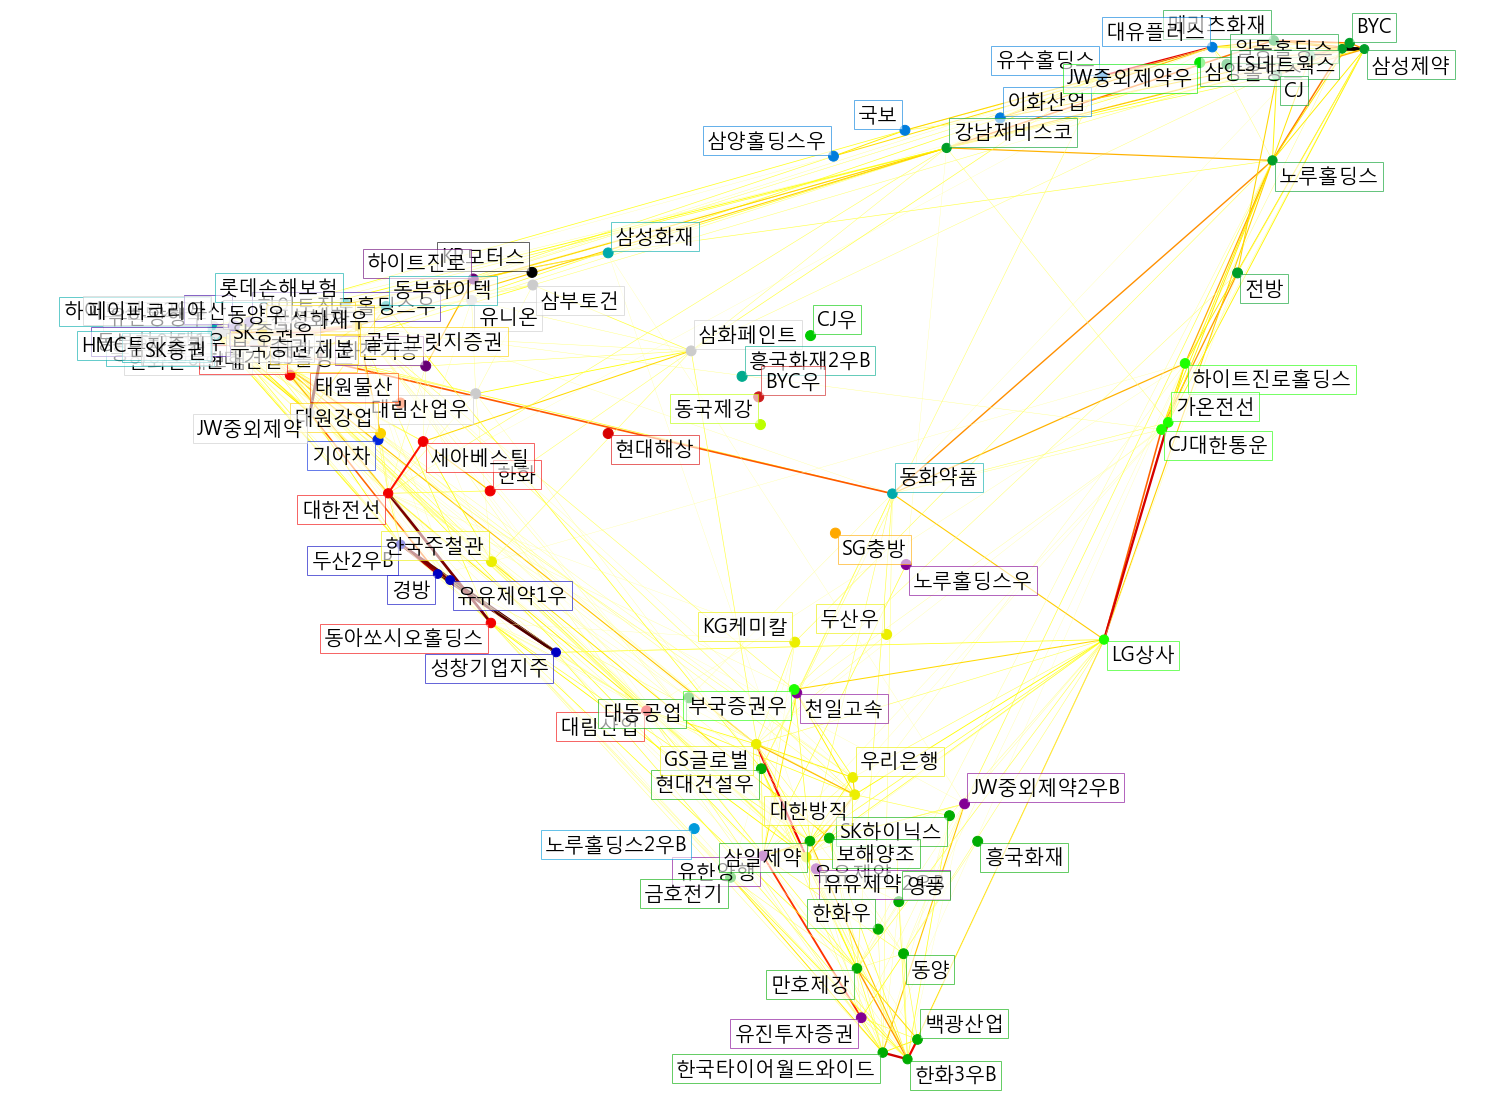

In [297]:
plt.figure(1, facecolor='w', figsize=(20, 15))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.Spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=20, #글자 크기
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.Spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()